## Теория вероятностей и математическая статистика
****************

In [2]:
%matplotlib inline
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [86]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x,y = zp, ks

b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a = np.mean(y) - b * np.mean(x)

print(a, b)

444.1773573243596 2.620538882402765


In [21]:
y_hat = a + b * x
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [39]:
mse_calc = ((y-y_hat)**2).sum()/len(y)
mse_calc

6470.414201176658

In [40]:
mse(y,y_hat)

6470.414201176658

In [23]:
y_hat_2 = b * x
y_hat_2

array([ 91.71886088, 117.92424971, 497.90238766, 524.10777648,
       104.8215553 , 183.43772177, 141.50909965, 393.08083236,
       314.46466589, 288.25927706])

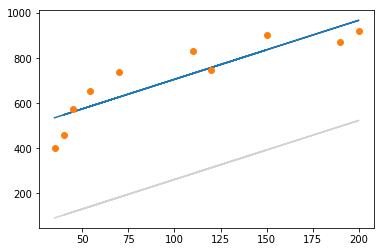

In [45]:
plt.plot(x, y_hat)
plt.plot(x,y,'o')
plt.plot(x,y_hat_2,c='lightgray')
plt.show()

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [92]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x,y = zp, ks

In [ ]:
def mse(B1,x=x,y=y,n=len(x)):

In [19]:
n = len(x)
B1 = 0.1
alpha=1e-6
for i in range(5000):
    B1 -=alpha*(2/n)*np.sum((B1*x-y)*x)
    if i%1000==0:
        print(f'Iter: {i}\t B1: {B1}')

Iter: 0	 B1: 0.25952808
Iter: 1000	 B1: 5.8898204201285544
Iter: 2000	 B1: 5.889820420132673
Iter: 3000	 B1: 5.889820420132673
Iter: 4000	 B1: 5.889820420132673


$B1 = 5.89$

3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

`Ответ:`
- Таблица Лапласа (z-функция) используется для данных, где можно  вычислить дисперсию и связанные с ней параметры.

- t-статистика используется на малых выборках, для которых заведомо неизвестна дисперсия. В отличие от функции Лапласа t-функция учитывает больше степеней свободы

4. *. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

$\frac{1}{n} \sum (\beta_0 + \beta_1x - y)^2$

$\frac{df}{d\beta_1} = \frac{2}{n}\sum(\beta_0 + \beta_1x - y)\cdot x$

$\frac{df}{d\beta_0} = \frac{2}{n}\sum(\beta_0 + \beta_1x - y)\cdot 1$

In [107]:
n = len(x)
init_ = 0.1
B1, B1_prev = init_, init_
B0, B0_prev = init_, init_
alpha=1e-5

for i in range(100000):
    B0 = B0_prev - alpha*(2/n)*np.sum(B0_prev + B1_prev*x-y)
    B1 = B1_prev - alpha*(2/n)*np.sum((B0_prev + B1_prev*x-y)*x)
    
    B0_prev = B0
    B1_prev = B1  
    
    if i%10000==0:
        print(f'Iter: {i}\t B1: {B1}\t B0: {B0}')

Iter: 0	 B1: 1.6950780000000003	 B0: 0.1139932
Iter: 10000	 B1: 5.727148917267028	 B0: 22.10895682095091
Iter: 20000	 B1: 5.573480252957227	 B0: 42.98659727947313
Iter: 30000	 B1: 5.427412818967859	 B0: 62.83152391579071
Iter: 40000	 B1: 5.288570619954364	 B0: 81.69481998525144
Iter: 50000	 B1: 5.1565962592059815	 B0: 99.62504190670468
Iter: 60000	 B1: 5.031150018663153	 B0: 116.66834425263008
Iter: 70000	 B1: 4.911908984441857	 B0: 132.86859855662837
Iter: 80000	 B1: 4.798566215614061	 B0: 148.2675062440768
Iter: 90000	 B1: 4.6908299541043625	 B0: 162.9047059766792


In [96]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(zp.reshape(-1,1), ks.reshape(-1,1))
regressor.coef_

array([[2.62053888]])